What we are trying to figure out
- can we predict % of Adults Who Are Highly Religious

Steps to go through in this Project

- Wrangle (Acquisition and Prep)

**- Explorattion <-- We are here**

- Evaluating Regression
- Feature Engineering

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from wrangle import wrangle_religion

import warnings
warnings.filterwarnings("ignore")

**Let's bring in our data**

In [2]:
df = wrangle_religion()

**Take a peek to make sure everthing came in ok**

In [3]:
df.sample(10)

,State_Name,Total_Number_of_Congregations,Total_Number_of_Adherents,Rates_of_Adherence_per_1000_Population,%_of_Adherents,%_of_Adults_Who_Are_“Highly_Religious”
15,Iowa,5107,1642344,539.12,0.53912,0.55
27,Nebraska,2860,1016529,556.59,0.55659,0.54
20,Maryland,5336,2415376,418.35,0.41835,0.54
18,Louisiana,5841,2746897,605.93,0.60593,0.71
28,Nevada,1392,927955,343.62,0.34362,0.49
10,Georgia,12292,4924376,508.31,0.50831,0.66
3,Arkansas,6697,1614357,553.64,0.55364,0.70
34,North Dakota,1498,451456,671.22,0.67122,0.53
43,Texas,27848,13994564,556.54,0.55654,0.64
50,Wyoming,948,223074,395.78,0.39578,0.54


**Now let's split our data before we move onto exploration**

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
train, test = train_test_split(df, train_size=.80, random_state=123)

In [6]:
train.head()

,State_Name,Total_Number_of_Congregations,Total_Number_of_Adherents,Rates_of_Adherence_per_1000_Population,%_of_Adherents,%_of_Adults_Who_Are_“Highly_Religious”
21,Massachusetts,4200,3748058,572.43,0.57243,0.33
24,Mississippi,6765,1742916,587.37,0.58737,0.77
11,Hawaii,1314,561980,413.13,0.41313,0.47
30,New Jersey,6114,4809520,547.04,0.54704,0.55
5,Colorado,4188,1902282,378.25,0.37825,0.47


In [7]:
train.shape

(40, 6)

In [8]:
train.corr()

,Total_Number_of_Congregations,Total_Number_of_Adherents,Rates_of_Adherence_per_1000_Population,%_of_Adherents,%_of_Adults_Who_Are_“Highly_Religious”
Total_Number_of_Congregations,1.000000,0.894674,0.128704,0.128704,0.289694
Total_Number_of_Adherents,0.894674,1.000000,0.090628,0.090628,-0.015735
Rates_of_Adherence_per_1000_Population,0.128704,0.090628,1.000000,1.000000,0.409291
%_of_Adherents,0.128704,0.090628,1.000000,1.000000,0.409291
%_of_Adults_Who_Are_“Highly_Religious”,0.289694,-0.015735,0.409291,0.409291,1.000000


In [36]:
def plot_corr_heatmat(df, color='Purples'):
    """
    Takes in a dataframe and returns a heatmap of the correlations
    """
    plt.figure(figsize=(10,10))
    sns.heatmap(df.corr(), cmap=color, annot=True)

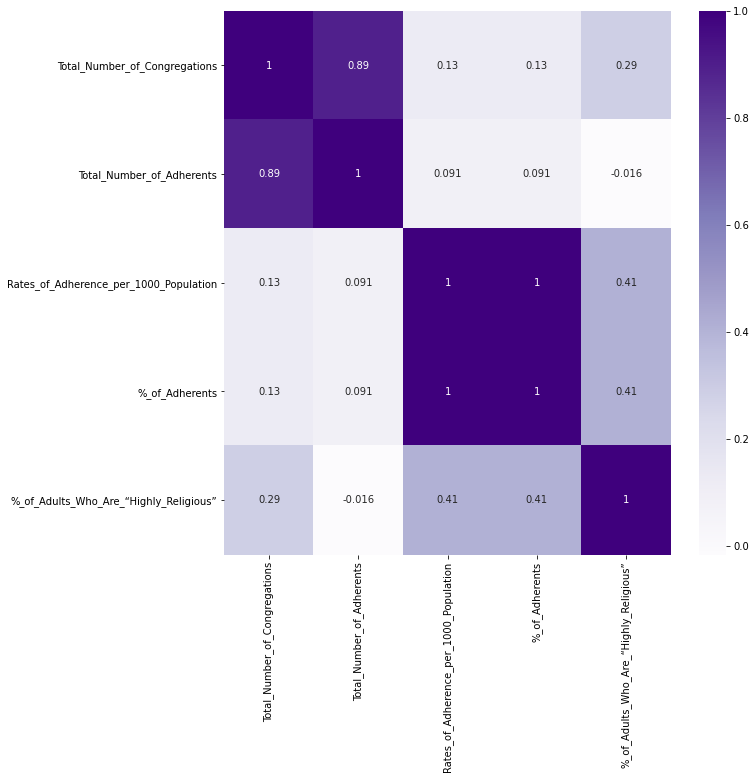

In [37]:
plot_corr_heatmat(train)

In [41]:
def plot_variable_pairs(df):
    """
    This function returns a pairplot to help explore relationships
    """
    plt.figure(figsize=(10,10))
    sns.pairplot(df, kind="reg", plot_kws={"line_kws":{"color":"purple"}, "scatter_kws":{"alpha": 0.5}})

<Figure size 720x720 with 0 Axes>

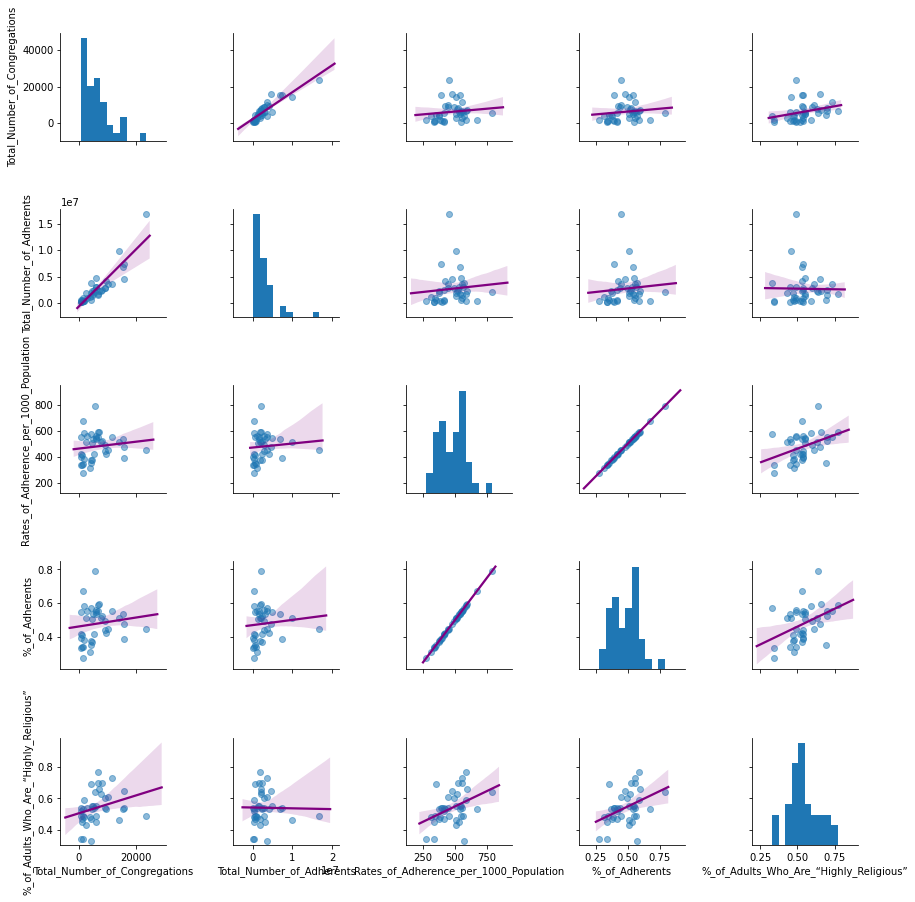

In [42]:
plot_variable_pairs(train)

Based on my heatmap and pairplot I feel we can use total Number of Congreations and Rates of Adherence per 1000 pop to predict % of adults who are highly religious.

- I am now going to see if I can somehow create a new feature using the 2 columns I specified that  has an even stronger correlation to my predicted value (this is part of the feature engineering)

In [16]:
train2 = train[["Total_Number_of_Congregations", "Rates_of_Adherence_per_1000_Population", '%_of_Adults_Who_Are_“Highly_Religious”']]

In [19]:
train2.head()

,Total_Number_of_Congregations,Rates_of_Adherence_per_1000_Population,%_of_Adults_Who_Are_“Highly_Religious”
21,4200,572.43,0.33
24,6765,587.37,0.77
11,1314,413.13,0.47
30,6114,547.04,0.55
5,4188,378.25,0.47


In [21]:
train2["N_Congregation_divided_Rates_of_Adherence"] = train2["Total_Number_of_Congregations"] / train2["Rates_of_Adherence_per_1000_Population"]

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
train2.head()

,Total_Number_of_Congregations,Rates_of_Adherence_per_1000_Population,%_of_Adults_Who_Are_“Highly_Religious”,N_Congregation_divided_Rates_of_Adherence
21,4200,572.43,0.33,7.337142
24,6765,587.37,0.77,11.517442
11,1314,413.13,0.47,3.180597
30,6114,547.04,0.55,11.176514
5,4188,378.25,0.47,11.072042


In [27]:
train2["N_Congregation_times_Rates_of_Adherence"] = train2["Total_Number_of_Congregations"] * train2["Rates_of_Adherence_per_1000_Population"]
train2.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Total_Number_of_Congregations,Rates_of_Adherence_per_1000_Population,%_of_Adults_Who_Are_“Highly_Religious”,N_Congregation_divided_Rates_of_Adherence,N_Congregation_times_Rates_of_Adherence
21,4200,572.43,0.33,7.337142,2404206.00
24,6765,587.37,0.77,11.517442,3973558.05
11,1314,413.13,0.47,3.180597,542852.82
30,6114,547.04,0.55,11.176514,3344602.56
5,4188,378.25,0.47,11.072042,1584111.00


In [28]:
train2["Rates_of_Adherence_divided_	Total_Number_of_Congregations"] = train2["Rates_of_Adherence_per_1000_Population"]/train2["Total_Number_of_Congregations"]
train2.head()

,Total_Number_of_Congregations,Rates_of_Adherence_per_1000_Population,%_of_Adults_Who_Are_“Highly_Religious”,N_Congregation_divided_Rates_of_Adherence,N_Congregation_times_Rates_of_Adherence,Rates_of_Adherence_divided_\tTotal_Number_of_Congregations
21,4200,572.43,0.33,7.337142,2404206.00,0.136293
24,6765,587.37,0.77,11.517442,3973558.05,0.086825
11,1314,413.13,0.47,3.180597,542852.82,0.314406
30,6114,547.04,0.55,11.176514,3344602.56,0.089473
5,4188,378.25,0.47,11.072042,1584111.00,0.090318


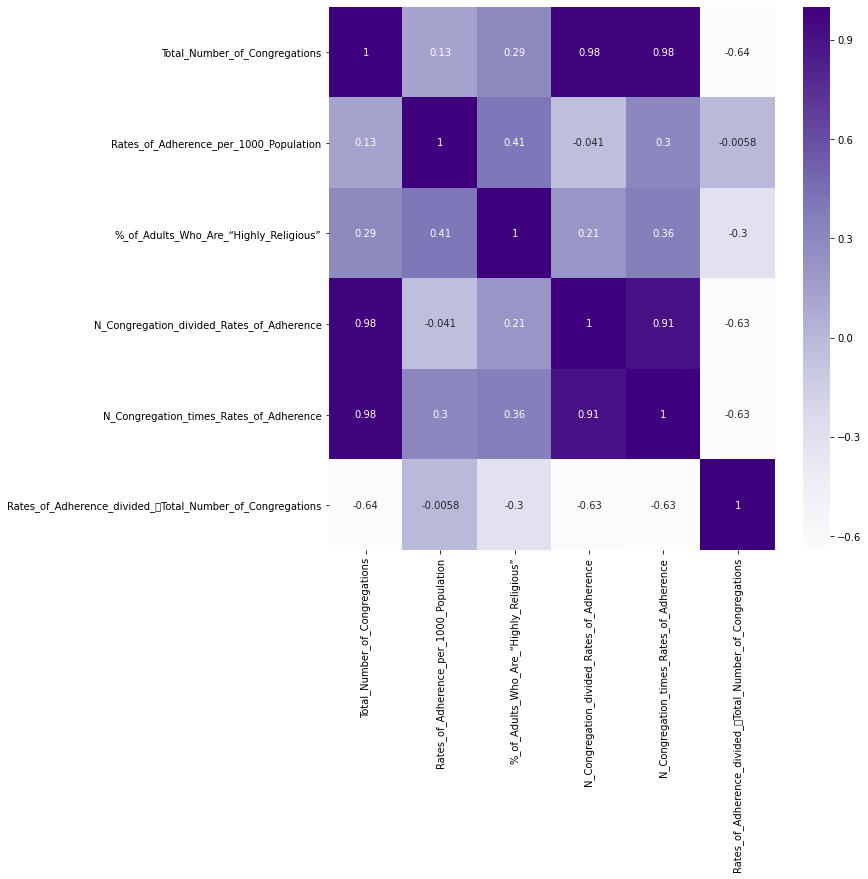

In [47]:
plot_corr_heatmat(train2)